# 1. Toy problem

(0.0, 11.0)

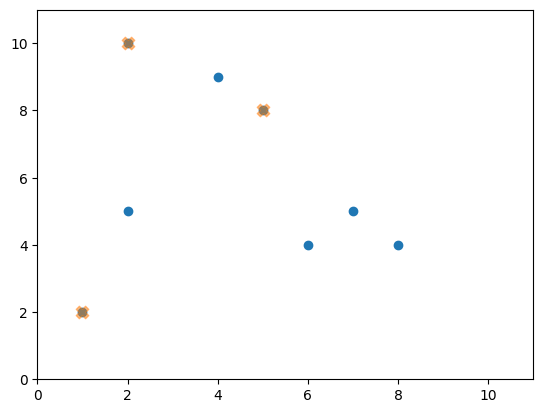

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

data_points_x = [2,2,8,5,7,6,1,4]
data_points_y = [10,5,4,8,5,4,2,9]
plt.scatter(data_points_x, data_points_y)
plt.scatter([2,5,1],[10,8,2], marker='X',s=80, alpha=0.5)
plt.xlim([0,11])
plt.ylim([0,11])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def k_means_clustering(points, n_clusters, max_iter=1000, tol=1e-4, init=None):
    num_points, num_features = points.shape

    if init is None:
        centroids = points[np.random.choice(num_points, n_clusters, replace=False)]
    else:
        centroids = init

    # Initialize an empty list to store the inertia values
    inertia_values = []

    for iteration in range(max_iter):
        # Calculate distances between points and centroids
        distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=-1)

        # Assign points to the closest centroid
        cluster_assignments = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.zeros_like(centroids)
        for i in range(n_clusters):
            points_in_cluster = points[cluster_assignments == i]
            if len(points_in_cluster) > 0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)

        # Calculate the inertia (sum of squared distances) for the current iteration
        inertia = np.sum(distances[np.arange(num_points), cluster_assignments])
        inertia_values.append(inertia)

        # Check convergence
        centroid_diff = np.linalg.norm(new_centroids - centroids)
        if centroid_diff < tol:
            break

        centroids = new_centroids

    # Calculate the change rate of inertia (inertia change per iteration)
    inertia_change_rate = np.diff(inertia_values)

    return cluster_assignments, centroids, inertia_change_rate, iteration+1

def visualize_inertia_change(inertia_change_rate, num_iterations):
    # Plot the change rate of inertia over iterations
    plt.plot(range(1, num_iterations), inertia_change_rate)
    plt.title('Change Rate of Inertia per Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Change Rate')
    plt.show()

def visualize_clustering(points, cluster_assignments, centroids):
    plt.scatter(points[:, 0], points[:, 1], c=cluster_assignments)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.title('K-means Clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [ ]:
# Data points
data_points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Pre-determined cluster centroids
centroids = np.array([[2, 10], [5, 8], [1, 2]])

# Execute K-means clustering and get cluster assignments, centroids, inertia change rate, and the number of iterations
cluster_assignments, final_centroids, inertia_change_rate, num_iterations = k_means_clustering(data_points, n_clusters=len(centroids), init=centroids)

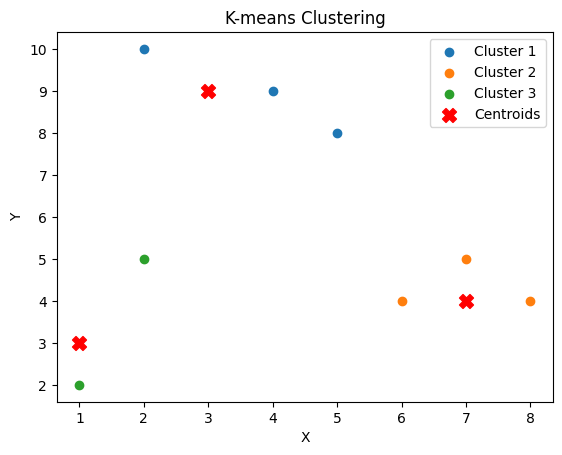

In [ ]:
# Define cluster labels
cluster_labels = ['Cluster {}'.format(i+1) for i in range(len(centroids))]

# Visualize the results
for i in range(len(centroids)):
    cluster_points = data_points[cluster_assignments == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=cluster_labels[i])

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

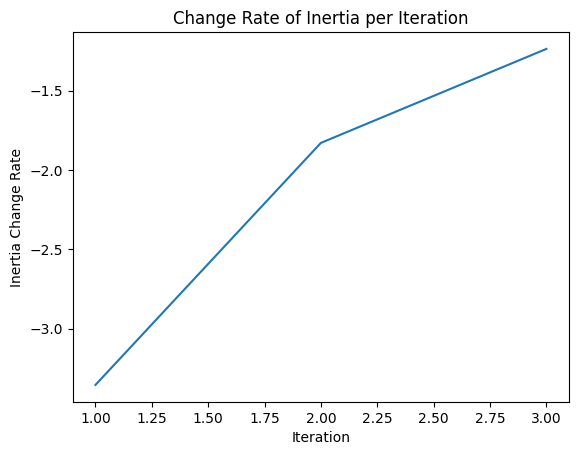

Number of iterations: 4


In [ ]:
# Visualize the change rate of inertia over iterations
visualize_inertia_change(inertia_change_rate, num_iterations)

print("Number of iterations:", num_iterations)

# 2. Open-ended problem

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.path import Path
import seaborn as sns

In [ ]:
territory = pd.read_csv("/content/drive/MyDrive/intML/South_Korea_territory.csv")
territory

,Longitude (deg),Latitude (deg)
0,128.364919,38.624335
1,128.394784,38.578074
2,128.441417,38.505805
3,128.450694,38.474107
4,128.474457,38.426093
...,...,...
1588,128.276955,38.554056
1589,128.274785,38.571497
1590,128.281089,38.584416
1591,128.308374,38.601340


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
candidate = pd.read_csv("/content/drive/MyDrive/intML/Vertiport_candidates.csv")
candidate

,Longitude (deg),Latitude (deg)
0,126.940197,37.621876
1,127.096292,37.535756
2,126.939432,37.492020
3,127.033749,37.612760
4,126.839673,37.561111
...,...,...
7769,126.855395,33.423088
7770,126.225025,33.268913
7771,126.397977,33.336998
7772,126.719626,33.291340


In [ ]:
import matplotlib.pyplot as plt

(125.95523115325004, 129.76020348375002, 34.07561676650003, 38.840940659500085)

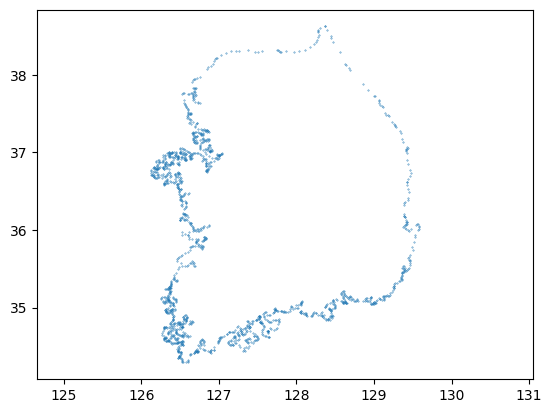

In [ ]:
plt.scatter(territory['Longitude (deg)'], territory['Latitude (deg)'], s=0.1)
#plt.scatter(candidate['Longitude (deg)'], candidate['Latitude (deg)'], s=0.1)
plt.axis('equal')

In [ ]:
# fill points in the territory

territory_df = pd.DataFrame({
    'x': territory['Longitude (deg)'],
    'y': territory['Latitude (deg)']
})

territory_coords = np.array(territory_df[['x', 'y']])
polygon = Path(territory_coords)


min_x, max_x = territory_coords[:, 0].min(), territory_coords[:, 0].max()
min_y, max_y = territory_coords[:, 1].min(), territory_coords[:, 1].max()
x_inside = np.linspace(min_x, max_x, 100)
y_inside = np.linspace(min_y, max_y, 100)
points_inside = np.array(np.meshgrid(x_inside, y_inside)).T.reshape(-1, 2)


mask = polygon.contains_points(points_inside)
points_selected = points_inside[mask]

filled_df = pd.DataFrame(points_selected, columns=['x', 'y'])

filled_df.head()
x=np.array(filled_df['x'])
y=np.array(filled_df['y'])
print(x)

[126.1631245  126.1631245  126.19806456 ... 129.51737008 129.55231014
 129.55231014]


(125.99366521719449, 129.72176941980555, 34.12375135127781, 38.79280607472231)

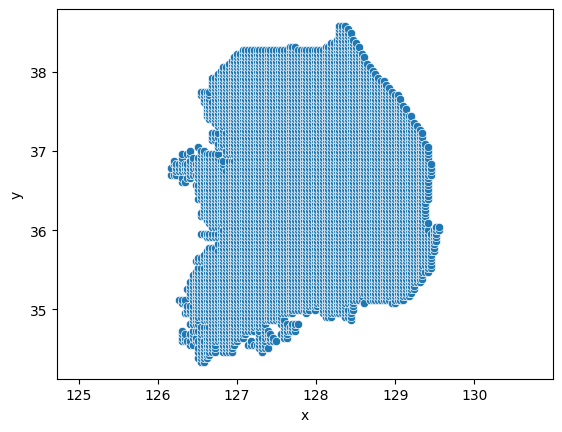

In [ ]:
sns.scatterplot(x='x', y='y', data = filled_df)
plt.axis('equal')

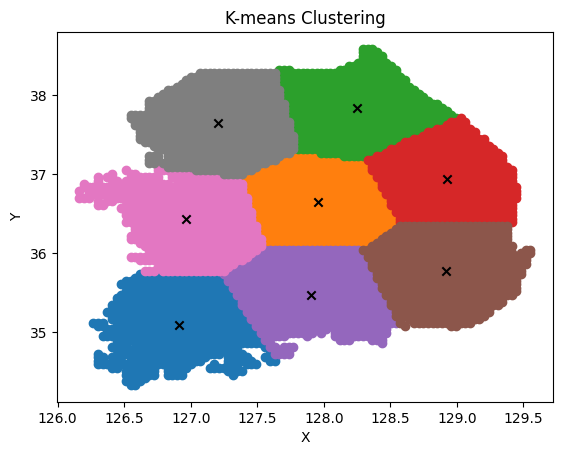

In [ ]:
def kmeans(data, k, max_iterations=100, tolerance=1e-4, initial_centroids=None):
    if initial_centroids is None:
        # Randomly initialize the centroids
        centroids = random.sample(data, k)
    else:
        centroids = initial_centroids

    converged = False
    iteration = 0
    while not converged and iteration < max_iterations:
        # Assign each data point to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid_index = distances.index(min(distances))
            clusters[closest_centroid_index].append(point)

        # Calculate new centroids
        new_centroids = []
        for cluster in clusters:
            if len(cluster) > 0:
                new_centroids.append(calculate_centroid(cluster))
            else:
                # If a centroid has no points assigned to it, keep the previous centroid
                new_centroids.append(centroids[clusters.index(cluster)])

        # Check for convergence
        centroid_shifts = [euclidean_distance(old, new) for old, new in zip(centroids, new_centroids)]
        if max(centroid_shifts) < tolerance:
            converged = True
        else:
            centroids = new_centroids
            iteration += 1

    return clusters, centroids
def euclidean_distance(point1, point2):
    squared_distance = sum([(a - b) ** 2 for a, b in zip(point1, point2)])
    return math.sqrt(squared_distance)

def calculate_centroid(cluster):
    centroid = [sum(coords) / len(cluster) for coords in zip(*cluster)]
    return centroid
# Set the range for random centroid points
x_min, x_max = 120, 130
y_min, y_max = 30, 40

# Generate random centroid points within the specified range, excluding [0, 0]
centroids1 = []
while len(centroids1) < 8:
    centroid = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(8, 2))
    if not np.array_equal(centroid, [[0, 0]]):
        centroids1.append(centroid)

centroids1 = np.concatenate(centroids1, axis=0)

points = filled_df[['x', 'y']].values.tolist()

n_clusters = 8

cluster, centroids= kmeans(points, n_clusters)

# Visualize the clustering result
for i, cluster in enumerate(cluster):
    points = np.array(cluster)
    plt.scatter(points[:, 0], points[:, 1])

# Plot the centroids
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')

plt.show()


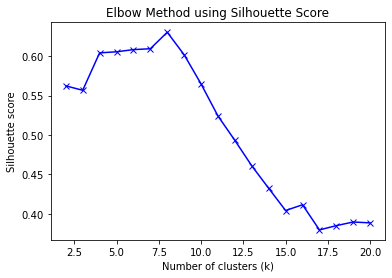

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Silhouette score visualization 

min_k = 2
max_k = 20

silhouette_scores = []

for k in range(min_k, max_k+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(filled_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(filled_df, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(min_k, max_k+1), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Elbow Method using Silhouette Score')
plt.show()

# 3. Vertiport

(125.95523115325004, 129.76020348375002, 32.94474160310429, 38.89479185775703)

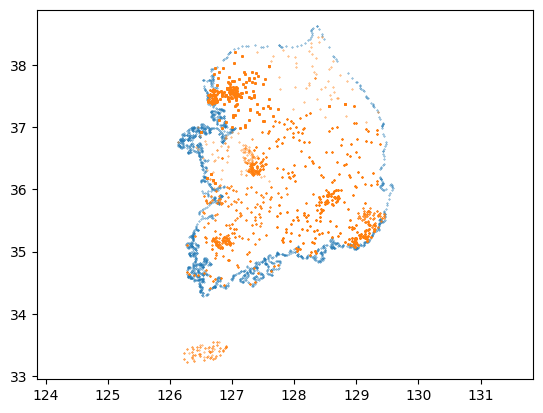

In [ ]:
plt.scatter(territory['Longitude (deg)'], territory['Latitude (deg)'], s=0.1)
plt.scatter(candidate['Longitude (deg)'], candidate['Latitude (deg)'], s=0.1)
plt.axis('equal')

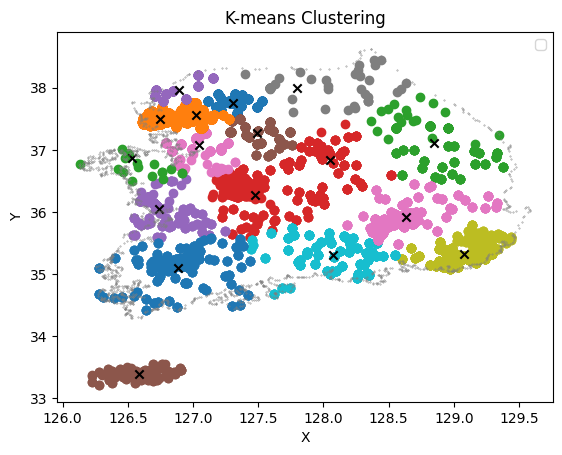

In [ ]:
centroids1 = []
while len(centroids1) < 8:
    centroid = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(17, 2))
    if not np.array_equal(centroid, [[0, 0]]):
        centroids1.append(centroid)

centroids1 = np.concatenate(centroids1, axis=0)

points = candidate[['Longitude (deg)', 'Latitude (deg)']].values.tolist()

n_clusters = 17

cluster, centroids= kmeans(points, n_clusters)

# Visualize the clustering result
for i, cluster in enumerate(cluster):
    points = np.array(cluster)
    plt.scatter(points[:, 0], points[:, 1])

# Plot the centroids
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x')
plt.scatter(territory['Longitude (deg)'], territory['Latitude (deg)'], s=0.1)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()

plt.show()

In [ ]:
centroids

array([[127.30817022,  37.75304745],
       [126.74897414,  37.50007047],
       [128.84614905,  37.1045433 ],
       [127.47455557,  36.27121825],
       [126.73833007,  36.05454944],
       [127.48833233,  37.27588148],
       [127.04692987,  37.07880159],
       [127.79853605,  38.00048845],
       [129.07667985,  35.31700695],
       [128.07268823,  35.31197422],
       [126.88054825,  35.09726272],
       [127.02458998,  37.55826405],
       [126.5307798 ,  36.87228775],
       [128.04678796,  36.83765517],
       [126.89041407,  37.96431005],
       [126.58561935,  33.3874641 ],
       [128.63425861,  35.91378304]])

In [ ]:
from scipy.spatial.distance import cdist

# Calculate the distance between each data point and the virtual datasets
distances = cdist(candidate[['Longitude (deg)', 'Latitude (deg)']], centroids)
closest_indices = distances.argmin(axis=0)
closest_data_points = candidate.iloc[closest_indices]

In [ ]:
print(closest_data_points)

      Longitude (deg)  Latitude (deg)
3436       127.324606       37.737651
2337       126.736485       37.519229
5463       128.831370       37.185597
2992       127.433453       36.254080
5998       126.710453       36.028577
3454       127.499383       37.310205
3442       126.994043       37.008560
5471       127.904017       38.147927
1457       129.077694       35.287533
7173       128.080643       35.267943
2746       126.907072       35.120289
44         127.019243       37.555338
5967       126.478588       36.860959
6801       128.076348       36.789000
3414       126.847895       37.953911
7722       126.621901       33.396161
1951       128.634434       35.882375


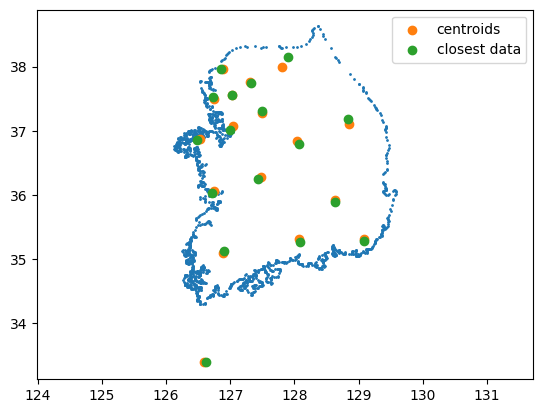

In [ ]:
plt.scatter(territory['Longitude (deg)'], territory['Latitude (deg)'], s=1)
plt.scatter(centroids[:,0], centroids[:,1], label='centroids')
plt.scatter(closest_data_points['Longitude (deg)'], closest_data_points['Latitude (deg)'], label='closest data')
plt.legend()
plt.axis('equal')
plt.show()

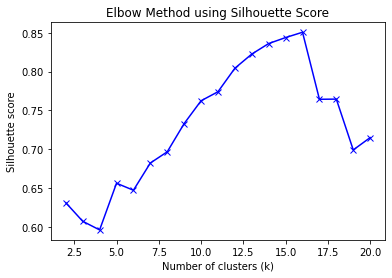

In [ ]:
# Silhouette score visualization
min_k = 2
max_k = 20

silhouette_scores = []

for k in range(min_k, max_k+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(candidate)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(candidate, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(min_k, max_k+1), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Elbow Method using Silhouette Score')
plt.show()

### Citation

K-means algorithm convergence criterion : IBM(https://www.ibm.com/docs/en/spss-statistics/beta?topic=analysis-k-means-cluster-convergence-criteria)

KMeans function code : ChatGPT

Concept of silhouette score : Scikit learn(https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

Visualization of silhouette score : ChatGPT